In [1]:
import xml.etree.ElementTree as ET
import pandas as pd

# Define a list to store the data
data = []
tree = ET.parse('net_jkt-new/output/lane-data.xml')
root = tree.getroot()

# Iterate over all "interval" elements in the root
for interval in root:
    # Get the attributes of the interval
    interval_attribs = interval.attrib
    
    # Iterate over all "edge" elements in the interval
    for edge in interval:
        # Get the attributes of the edge
        edge_attribs = edge.attrib
        
        # Iterate over all "lane" elements in the edge
        for lane in edge:
            # Get the attributes of the lane
            lane_attribs = lane.attrib
            
            # Combine the attributes of the interval, edge, and lane
            combined_attribs = {**interval_attribs, **edge_attribs, **lane_attribs}
            
            # Append the combined attributes to the data list
            data.append(combined_attribs)

# Convert the data list to a DataFrame
df = pd.DataFrame(data)

In [2]:
df['departed'] = df['departed'].astype(int)
df['entered'] = df['entered'].astype(int)
df['arrived'] = df['arrived'].astype(int)
df['left'] = df['left'].astype(int)


In [3]:
df['inflow'] = (df['departed'] + df['entered']) * 12
df['outflow'] = (df['arrived'] + df['left']) * 12

In [4]:
df = df[['begin', 'id', 'laneDensity', 'inflow', 'outflow']]

In [15]:
df

,begin,id,laneDensity,inflow,outflow,flow
0,28800.00,1_0,7.33,168,168,0
1,28800.00,1_1,10.76,240,216,24
2,28800.00,10_0,13.77,156,156,0
3,28800.00,10_1,11.58,228,204,24
4,28800.00,100_0,0.49,12,12,0
...,...,...,...,...,...,...
578,28800.00,gneE394_1,0.15,12,0,12
580,28800.00,gneE396_1,0.41,12,12,0
581,28800.00,gneE397_0,0.93,24,24,0
584,28800.00,gneE401_1,55.89,228,228,0


In [6]:
df['flow'] = df['inflow'] - df['outflow']

In [7]:
df = df.dropna()

In [17]:
df.describe()

,laneDensity,inflow,outflow,flow
count,380.000000,380.000000,380.000000,380.000000
mean,5.996211,95.084211,70.989474,24.094737
std,10.636786,167.166557,81.330298,144.898223
min,0.020000,0.000000,0.000000,-516.000000
25%,0.787500,12.000000,12.000000,0.000000
50%,2.205000,48.000000,48.000000,0.000000
75%,5.985000,96.000000,87.000000,24.000000
max,73.250000,1248.000000,516.000000,972.000000


In [13]:
df['laneDensity'] = df['laneDensity'].astype(float)

C:\Users\Muhammad Aditya\AppData\Local\Temp\ipykernel_15804\4284782482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['laneDensity'] = df['laneDensity'].astype(float)


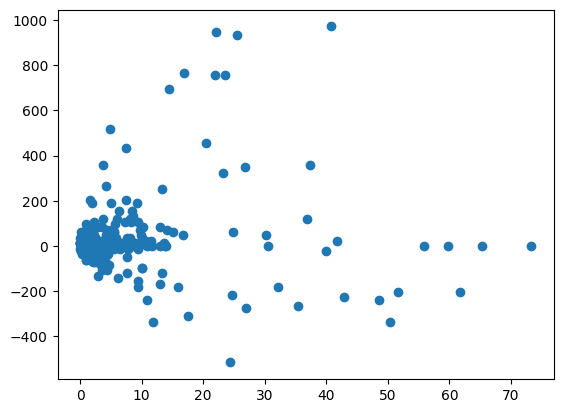

In [14]:
import matplotlib.pyplot as plt

plt.scatter(x=df['laneDensity'], y=df['flow'])
plt.show()

In [84]:
def get_data_group(csv_flow_and_density): #grouping data to pandas object
    #get flow(veh/hr) and density(veh/km) in each lane for certain interval 
    flowdensity = pd.read_csv(csv_flow_and_density, sep=';', header=0)

    #only for get a list of 'time' in mfd-data.csv
    flowdensity_lane = flowdensity.groupby('lane_ids')
    dummy_group = flowdensity_lane.get_group('1_0')
    time_list = dummy_group['time']

    #real grouping (group by time)
    flowdensity_time = flowdensity.groupby('time')
    return time_list, flowdensity_time

In [78]:
csv = "mfd-data-dqn-boltzman-min-exponen-K=25.csv"

In [79]:
time_list = {}
flowdensity_time = {}

In [85]:
time_list[csv], flowdensity_time[csv] = get_data_group(csv)

In [104]:
time_list.values()

dict_values([0         21600
587       21900
1174      22200
1761      22500
2348      22800
          ...  
116813    81300
117400    81600
117987    81900
118574    82200
119161    82500
Name: time, Length: 204, dtype: int64])

In [105]:
time_list[]

KeyError: 0

In [1]:
import pandas as pd

In [2]:
lane_length = pd.read_csv("lane-length-new.csv", sep=",")

In [3]:
lane_length

,lane,length
0,100_0,330.99
1,101_0,232.62
2,102_0,231.42
3,103[0]_0,31.14
4,103[0]_1,31.14
...,...,...
1344,gneE397_1,11.78
1345,gneE401_0,9.35
1346,gneE401_1,9.35
1347,gneE401_2,9.35


In [4]:
def get_lane_length(csv_lanelength): #get lane length information
    lanelength_data = pd.read_csv(csv_lanelength, skiprows=1, header=None)
    lane_list = lanelength_data[0]
    length_list = lanelength_data[1]/1000
    #store in dictionary : 
    lane_length = dict(zip(lane_list,length_list))
    return lane_length

In [5]:
lane_length_dict = get_lane_length("lane-length-new.csv")

In [6]:
lane_length_dict

{'100_0': 0.33099,
 '101_0': 0.23262,
 '102_0': 0.23142,
 '103[0]_0': 0.03114,
 '103[0]_1': 0.03114,
 '103[1].2_0': 0.14246,
 '103[1].2_1': 0.14246,
 '104.5_0': 0.35799000000000003,
 '104.5_1': 0.35799000000000003,
 '105_0': 0.07906,
 '105_1': 0.07906,
 '106_0': 0.14886000000000002,
 '107_0': 0.13856,
 '107_1': 0.13856,
 '108_0': 0.0183,
 '108_1': 0.0183,
 '109_0': 0.01887,
 '109_1': 0.01887,
 '10_0': 0.10701999999999999,
 '10_1': 0.10701999999999999,
 '110_0': 0.31933,
 '110_1': 0.31933,
 '111_0': 0.34103,
 '111_1': 0.34103,
 '112[0]_0': 0.45888999999999996,
 '112[0]_1': 0.45888999999999996,
 '112[1]_0': 0.0314,
 '112[1]_1': 0.0314,
 '113[0]_0': 0.02336,
 '113[0]_1': 0.02336,
 '113[0]_2': 0.02336,
 '113[1][0]_0': 0.43542000000000003,
 '113[1][0]_1': 0.43542000000000003,
 '113[1][0]_2': 0.43542000000000003,
 '114_0': 0.14712,
 '114_1': 0.14712,
 '115_0': 0.12819,
 '115_1': 0.12819,
 '116_0': 0.23733,
 '116_1': 0.23733,
 '116_2': 0.23733,
 '116_3': 0.23733,
 '116_4': 0.23733,
 '117_0': 